In [121]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [179]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [123]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [124]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    e = y - tx.dot(w)
    N = e.shape[0]
    loss = np.transpose(e).dot(e)/(2*N)
    return loss
    
    # TODO: compute loss by MSE
    # ***************************************************
    raise NotImplementedError

let's try out this function

In [125]:
w = np.array([1,2])
compute_loss(y,tx,w)

2694.483365887084

# 2 Grid Search

Fill in the function `grid_search()` below:

In [126]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    for i in range(len(w0)):
        for j in range(len(w1)):
            w = np.array([w0[i],w1[j]])
            losses[i,j] = compute_loss(y, tx, w)
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    return losses
    raise NotImplementedError
    

In [127]:
w0 = [1,2,3,4]
w1 = [4,5,6,7]
grid_search(y, tx, w0, w1)

array([[2673.52394102, 2664.54422858, 2656.56451615, 2649.58480371],
       [2601.73001902, 2592.75030658, 2584.77059415, 2577.79088171],
       [2530.93609701, 2521.95638458, 2513.97667214, 2506.99695971],
       [2461.14217501, 2452.16246258, 2444.18275014, 2437.20303771]])

In [128]:
generate_w(num_intervals=10)

(array([-100.        ,  -66.66666667,  -33.33333333,    0.        ,
          33.33333333,   66.66666667,  100.        ,  133.33333333,
         166.66666667,  200.        ]),
 array([-150.        , -116.66666667,  -83.33333333,  -50.        ,
         -16.66666667,   16.66666667,   50.        ,   83.33333333,
         116.66666667,  150.        ]))

Let us play with the grid search demo now!

Grid Search: loss*=15.558703368609532, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.473 seconds


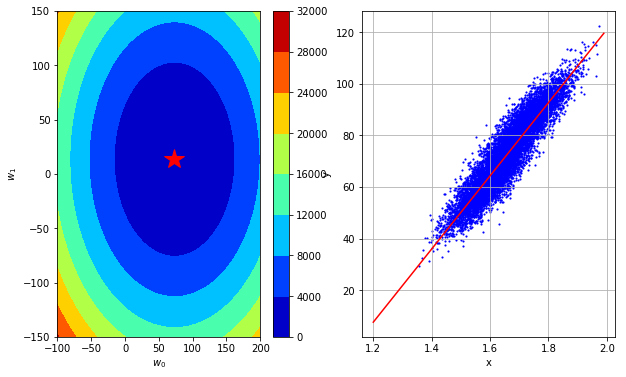

In [129]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [130]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    e = y - tx.dot(w)
    N = e.shape[0]
    gradient = - 1/N * np.transpose(tx).dot(e)
    return gradient
    
    # TODO: compute gradient and error vector
    # ***************************************************
    raise NotImplementedError

In [131]:
(y-tx.dot(w)).shape[0]

10000

In [132]:
w = np.array([100,20])
compute_gradient(y, tx, w)

array([26.706078  ,  6.52028757])

In [133]:
w = np.array([50,10])
compute_gradient(y, tx, w)

array([-23.293922  ,  -3.47971243])

Please fill in the functions `gradient_descent` below:

In [134]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # TODO: compute gradient and loss
        # ***************************************************
        
        # ***************************************************
        w = w - gamma*gradient
        # TODO: update w by gradient
        # ***************************************************
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [258]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.array([-10, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=3490.378808430329, w0=31.646961001052652, w1=11.73985621749453
Gradient Descent(1/49): loss=884.1341180092018, w0=52.470441501578904, w1=12.609784326241757
Gradient Descent(2/49): loss=232.57294540392292, w0=62.88218175184207, w1=13.04474838061537
Gradient Descent(3/49): loss=69.68265225260257, w0=68.08805187697364, w1=13.2622304078022
Gradient Descent(4/49): loss=28.960078964772656, w0=70.69098693953943, w1=13.370971421395623
Gradient Descent(5/49): loss=18.779435642815177, w0=71.99245447082231, w1=13.425341928192337
Gradient Descent(6/49): loss=16.23427481232584, w0=72.64318823646374, w1=13.45252718159069
Gradient Descent(7/49): loss=15.597984604703516, w0=72.96855511928447, w1=13.46611980828987
Gradient Descent(8/49): loss=15.438912052797928, w0=73.13123856069483, w1=13.472916121639459
Gradient Descent(9/49): loss=15.399143914821531, w0=73.21258028140001, w1=13.476314278314254
Gradient Descent(10/49): loss=15.389201880327434, w0=73.2532511417526, w1=13.4

In [259]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [288]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    e = y - tx.dot(w)
    B = e.shape[0]
    gradient = - 1/B * np.transpose(tx).dot(e)
    return gradient

    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        for y_batch,tx_batch in batch_iter(y, tx, batch_size=5, num_batches=2):
            gradient = compute_gradient(y_batch, tx_batch, w)
            loss = compute_loss(y_batch, tx_batch, w)
            # TODO: compute gradient and loss
            # ***************************************************

            # ***************************************************
            w = w - gamma*gradient
            # TODO: update w by gradient
            # ***************************************************

            # store w and loss
            ws.append(w)
            losses.append(loss)
            print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    print(ws)
    return losses, ws

In [278]:
len(y)

10000

In [279]:
for y_batch,tx_batch in batch_iter(y, tx, batch_size=5, num_batches=10):
    print(y_batch)
    print(tx_batch)

[71.22840204 76.93452487 75.47839227 57.87144722 64.34799681]
[[ 1.         -0.02749046]
 [ 1.          0.38261035]
 [ 1.          0.09565892]
 [ 1.         -1.15140596]
 [ 1.         -0.4871744 ]]
[71.81982452 96.4493536  95.66821814 84.23232615 78.47262193]
[[ 1.         -0.13497999]
 [ 1.          1.34515124]
 [ 1.          1.57629115]
 [ 1.          0.44349895]
 [ 1.          0.59947977]]
[58.17453456 94.65631267 84.19196884 76.50841742 53.96258673]
[[ 1.         -1.23630715]
 [ 1.          1.26591719]
 [ 1.          1.10434945]
 [ 1.          0.26686557]
 [ 1.         -1.77230832]]
[65.77276701 65.2035212  73.94409387 60.94720048 54.85222101]
[[ 1.         -0.76679551]
 [ 1.         -0.51336317]
 [ 1.          0.13509705]
 [ 1.          0.01333538]
 [ 1.         -1.82787579]]
[77.03256817 58.4560835  54.97696252 70.92567714 89.61445458]
[[ 1.         -0.16674596]
 [ 1.         -1.21134173]
 [ 1.         -0.39764395]
 [ 1.         -0.16593246]
 [ 1.          1.1610616 ]]
[76.759021

In [280]:
w_initial = np.array([0, 0])
w = w_initial
for n_iter in range(max_iters):
    # ***************************************************
    for y_batch,tx_batch in batch_iter(y, tx, batch_size=10, num_batches=1):
        gradient = compute_gradient(y_batch, tx_batch, w)
        loss = compute_loss(y_batch, tx_batch, w)
        w = w - gamma*gradient
        print('g',gradient)
        print('w',w)

g [-71.98974013   4.61638222]
w [35.99487006 -2.30819111]
g [-40.80066373 -37.6588264 ]
w [56.39520193 16.52122209]
g [-18.68983267   6.65377451]
w [65.74011827 13.19433484]
g [-8.66462042 -2.75879199]
w [70.07242847 14.57373083]
g [-4.43737545 -0.5745422 ]
w [72.2911162  14.86100193]
g [-3.22883626  1.53795754]
w [73.90553433 14.09202316]
g [-2.4134124  -0.22627082]
w [75.11224053 14.20515857]
g [ 0.63743172 -0.17283686]
w [74.79352467 14.291577  ]
g [ 0.97033471 -2.65016217]
w [74.30835732 15.61665809]
g [-0.62104775  6.82996964]
w [74.61888119 12.20167327]
g [-1.54722816 -3.19241703]
w [75.39249527 13.79788178]
g [ 3.28303642 -0.78344861]
w [73.75097706 14.18960609]
g [0.88683789 0.59455039]
w [73.30755811 13.89233089]
g [-0.87524125  0.51606745]
w [73.74517874 13.63429717]
g [ 0.3010836  -1.41499845]
w [73.59463694 14.34179639]
g [ 2.68077135 -1.88948413]
w [72.25425126 15.28653846]
g [-0.44740521 -0.32056606]
w [72.47795387 15.44682149]
g [-1.54908034  0.59058132]
w [73.25249404 1

In [289]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.2
batch_size = 10000

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2649.9492343943957, w0=14.393599620345766, w1=-2.7000527487435493
Gradient Descent(0/49): loss=1440.899336991983, w0=24.56445827067376, w1=-3.778356007617905
Gradient Descent(1/49): loss=1451.4146262208365, w0=35.053676597685445, w1=-1.023860812307389
Gradient Descent(1/49): loss=694.8697506879113, w0=41.97238184849525, w1=0.5720912602468156
Gradient Descent(2/49): loss=492.2721683748717, w0=47.36548573414329, w1=1.3488600090812342
Gradient Descent(2/49): loss=349.41585176882757, w0=52.312237524452584, w1=1.7871120855383178
Gradient Descent(3/49): loss=159.43786325558906, w0=55.066035035219535, w1=3.3335498923285574
Gradient Descent(3/49): loss=215.52475138658093, w0=58.859802852669105, w1=5.882127802445639
Gradient Descent(4/49): loss=104.56546886068618, w0=61.30954355362307, w1=6.531808214095406
Gradient Descent(4/49): loss=28.23845012401106, w0=61.864543257142195, w1=7.954921301867967
Gradient Descent(5/49): loss=29.472624453229468, w0=63.14662526249556,

In [255]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)